In [ ]:
!pip install yfinance prophet

In [3]:
from indicators import get_pair_tickers
import pandas as pd
usdt_tickers = get_pair_tickers()
data = pd.read_pickle(f'C:/Users/remik/Documents/GitHub/CryptoDRL/CryptoDRL/usdt_data/{usdt_tickers[1]}.pickle').astype(float)
data = data[['open','high','low','close','volume','trades']].dropna()

In [4]:
btcdata = pd.read_pickle(f'C:/Users/remik/Documents/GitHub/CryptoDRL/CryptoDRL/usdt_data/BTCUSDT.pickle').astype(float)
btcdata = btcdata[['open','high','low','close','volume','trades']].dropna()

In [5]:
from prophet import Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
train_end_date = data.index[int(len(data)*.75)]

In [ ]:
#essayer avec toutes les features ou k-acp

In [20]:
df = pd.DataFrame()
df['ds']=data.index.copy()
df['y']=data['close'].copy().reset_index(drop=True)
df['MA'] = data['close'].rolling(window=3).mean().copy().reset_index(drop=True)
df = df.iloc[2:,:]

15:58:16 - cmdstanpy - INFO - Chain [1] start processing
15:59:29 - cmdstanpy - INFO - Chain [1] done processing


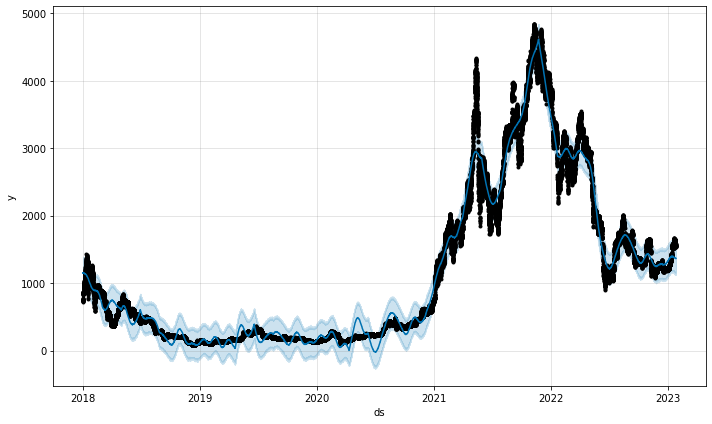

In [22]:
model_baseline = Prophet()
model_baseline.fit(df)
future_baseline = model_baseline.make_future_dataframe(periods=24, freq='H')
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline);

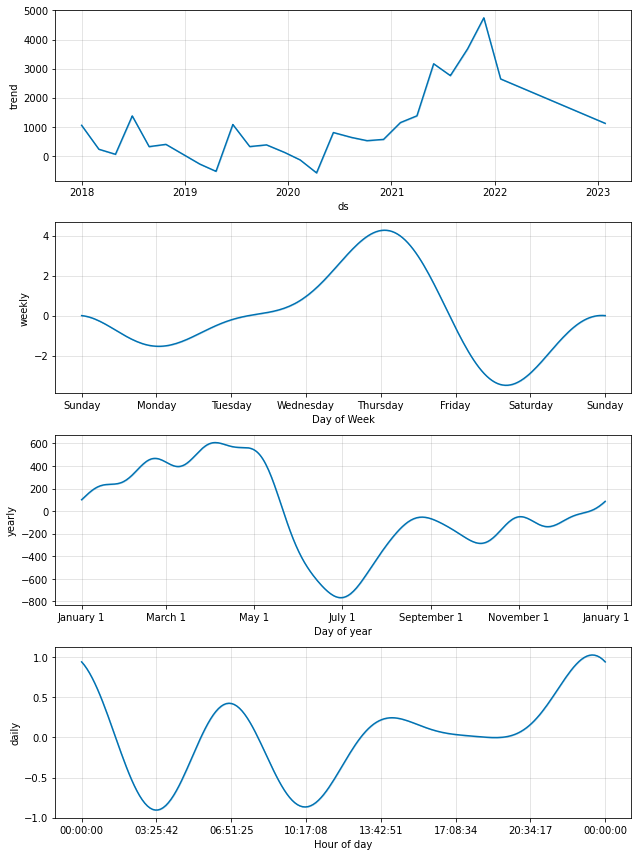

In [23]:
model_baseline.plot_components(forecast_baseline);

In [28]:
performance_baseline = pd.merge(df, forecast_baseline[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][:-24], on='ds')
performance_baseline_MAE = mean_absolute_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAE for the baseline model is {performance_baseline_MAE}')
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline['y'], performance_baseline['yhat'])
print(f'The MAPE for the baseline model is {performance_baseline_MAPE}')

The MAE for the baseline model is 118.42723310821172
The MAPE for the baseline model is 0.20825224752128818


In [26]:
performance_baseline

,ds,y,MA,yhat,yhat_lower,yhat_upper
0,2018-01-01 02:00:00,724.05,723.213333,1149.625063,912.664412,1364.452044
1,2018-01-01 03:00:00,734.50,725.506667,1149.052945,937.493765,1386.711736
2,2018-01-01 04:00:00,744.82,734.456667,1149.050849,942.341229,1371.049518
3,2018-01-01 05:00:00,748.99,742.770000,1149.532795,918.138451,1365.546546
4,2018-01-01 06:00:00,762.18,751.996667,1150.056575,940.024165,1371.118846
...,...,...,...,...,...,...
44295,2023-01-25 17:00:00,1548.70,1547.206667,1370.676725,1157.758207,1602.863796
44296,2023-01-25 18:00:00,1555.54,1551.070000,1370.690987,1146.915927,1587.968488
44297,2023-01-25 19:00:00,1561.48,1555.240000,1370.704885,1132.970581,1583.126395
44298,2023-01-25 20:00:00,1580.69,1565.903333,1370.777795,1163.667569,1602.463863


<AxesSubplot: >

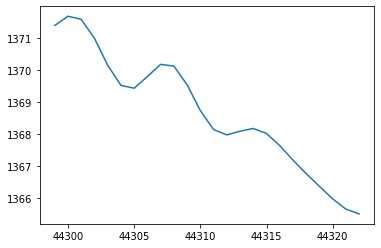

In [31]:
forecast_baseline.iloc[-24:]['yhat'].plot()

17:29:17 - cmdstanpy - INFO - Chain [1] start processing
17:29:23 - cmdstanpy - INFO - Chain [1] done processing


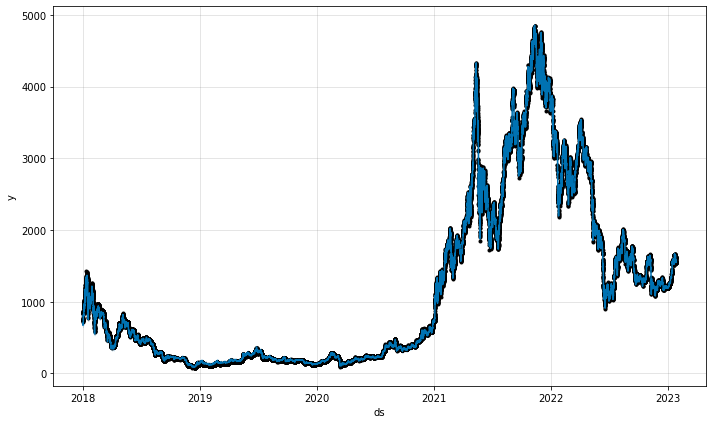

In [54]:
model_multivariate = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model_multivariate.add_regressor('MA', standardize=False)
model_multivariate.fit(df)
future_multivariate = model_multivariate.make_future_dataframe(periods=24, freq='H')
future_multivariate = pd.merge(future_multivariate, df[['ds', 'MA']], on='ds', how='inner')
forecast_multivariate = model_multivariate.predict(future_multivariate)
model_multivariate.plot(forecast_multivariate);

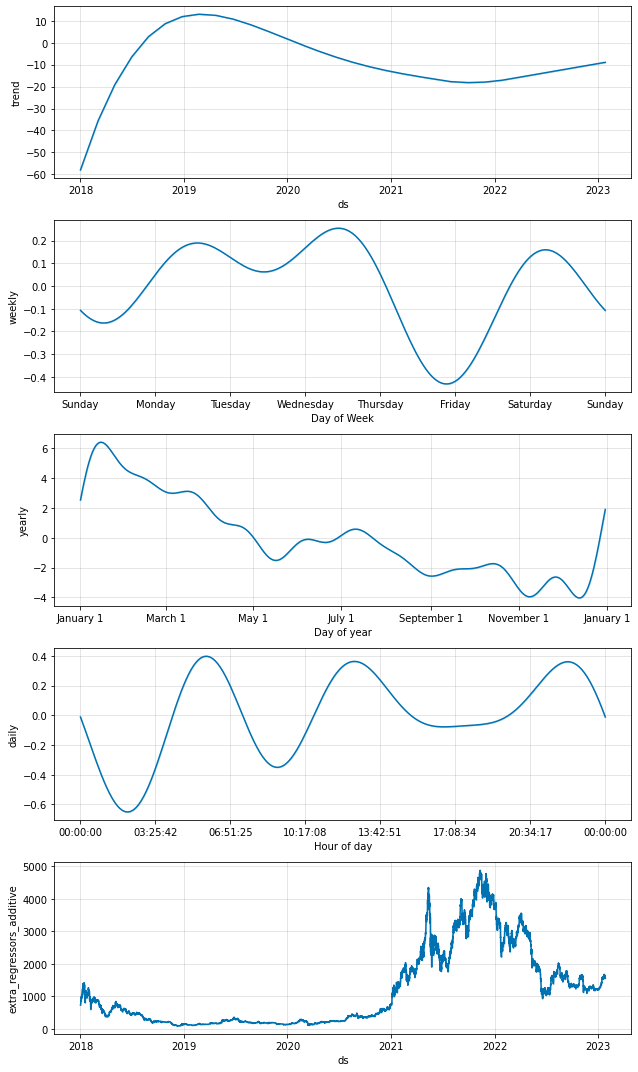

In [55]:
model_multivariate.plot_components(forecast_multivariate);

In [56]:
performance_multivariate = pd.merge(df, forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][:-24], on='ds')
performance_multivariate_MAE = mean_absolute_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAE for the seasonality model is {performance_multivariate_MAE}')
performance_multivariate_MAPE = mean_absolute_percentage_error(performance_multivariate['y'], performance_multivariate['yhat'])
print(f'The MAPE for the seasonality model is {performance_multivariate_MAPE}')

The MAE for the seasonality model is 11.315250435705396
The MAPE for the seasonality model is 0.025930382294567185


In [58]:
forecast_multivariate[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-24:]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01 02:00:00,671.740431,649.223131,692.795671
1,2018-01-01 03:00:00,674.233070,654.473096,694.513927
2,2018-01-01 04:00:00,683.703620,662.405724,704.256757
3,2018-01-01 05:00:00,692.513160,672.738881,714.248277
4,2018-01-01 06:00:00,701.941627,681.190310,723.715019
...,...,...,...,...
44295,2023-01-25 17:00:00,1553.683778,1534.331493,1574.942388
44296,2023-01-25 18:00:00,1557.560597,1534.583005,1576.731547
44297,2023-01-25 19:00:00,1561.758334,1540.713407,1582.420249
44298,2023-01-25 20:00:00,1572.554767,1552.191610,1591.758875


17:33:23 - cmdstanpy - INFO - Chain [1] start processing
17:33:40 - cmdstanpy - INFO - Chain [1] done processing


0                                      New Year's Day
1                          Martin Luther King Jr. Day
2                               Washington's Birthday
3                                        Memorial Day
4                                    Independence Day
5                                           Labor Day
6                                        Columbus Day
7                                        Veterans Day
8                             Veterans Day (Observed)
9                                        Thanksgiving
10                                      Christmas Day
11                        Independence Day (Observed)
12                          New Year's Day (Observed)
13               Juneteenth National Independence Day
14    Juneteenth National Independence Day (Observed)
15                           Christmas Day (Observed)
dtype: object

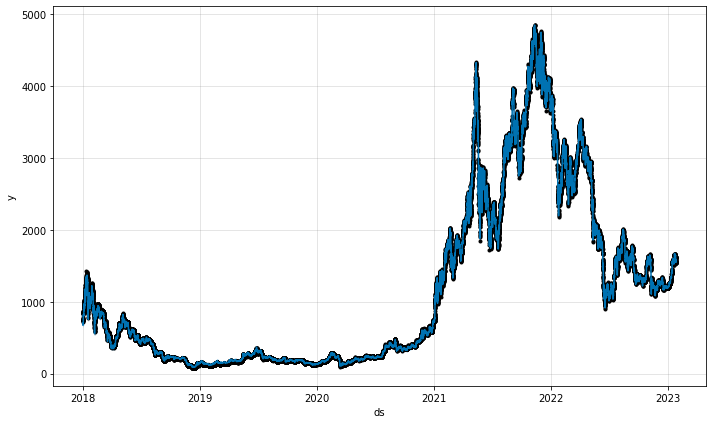

In [59]:
model_holiday = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model_holiday.add_country_holidays(country_name='US')
model_holiday.add_regressor('MA', standardize=False)
model_holiday.fit(df)
future_holiday = model_holiday.make_future_dataframe(periods=24, freq='H')
future_holiday = pd.merge(future_holiday, df[['ds', 'MA']], on='ds', how='inner')
forecast_holiday = model_holiday.predict(future_holiday)
model_holiday.plot(forecast_holiday);
model_holiday.train_holiday_names

In [170]:
# Fit the model on the training dataset
model_holiday.fit(df_train)

00:37:33 - cmdstanpy - INFO - Chain [1] start processing
00:38:08 - cmdstanpy - INFO - Chain [1] done processing


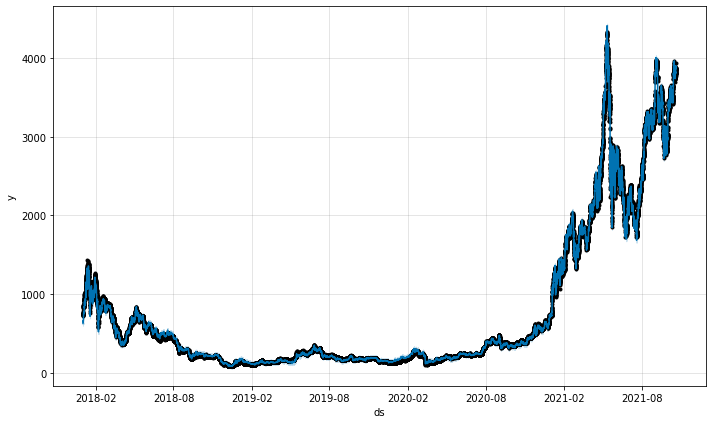

In [171]:
# Create the time range for the forecast
future_holiday = model_holiday.make_future_dataframe(periods=16)
# Append the regressor values
future_holiday = pd.merge(future_holiday, df_train[['ds', 'MA']], on='ds', how='inner')
# Fill the missing values with the previous value
future_holiday = future_holiday.fillna(method='ffill')
# Make prediction
forecast_holiday = model_holiday.predict(future_holiday)
# Visualize the forecast
model_holiday.plot(forecast_holiday); # Add semi-colon to remove the duplicated chart

In [181]:
performance_holiday = pd.concat([df_train['y'].reset_index(drop=True),forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].reset_index(drop=True)], axis=1)
performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the seasonality model is {performance_holiday_MAE}')
performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the seasonality model is {performance_holiday_MAPE}')

The MAE for the seasonality model is 16.31778214553784
The MAPE for the seasonality model is 0.04370288676318393


In [183]:
forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01 02:00:00,627.325881,599.600939,656.515918
1,2018-01-01 03:00:00,630.000222,600.667437,658.016036
2,2018-01-01 04:00:00,639.985237,610.905458,667.133727
3,2018-01-01 05:00:00,649.264944,621.438445,678.628653
4,2018-01-01 06:00:00,659.184283,632.017475,689.610890
...,...,...,...,...
33197,2021-10-20 08:00:00,3863.402997,3833.362866,3891.536504
33198,2021-10-20 09:00:00,3873.983263,3843.848002,3898.843587
33199,2021-10-20 10:00:00,3872.419753,3843.359102,3901.443237
33200,2021-10-20 11:00:00,3876.337839,3848.340616,3905.413543


In [117]:
df_train

,ds,y,MA
2,2018-01-01 02:00:00,724.05,723.213333
3,2018-01-01 03:00:00,734.50,725.506667
4,2018-01-01 04:00:00,744.82,734.456667
5,2018-01-01 05:00:00,748.99,742.770000
6,2018-01-01 06:00:00,762.18,751.996667
...,...,...,...
33199,2021-10-20 08:00:00,3850.62,3848.970000
33200,2021-10-20 09:00:00,3868.59,3859.160000
33201,2021-10-20 10:00:00,3853.46,3857.556667
33202,2021-10-20 11:00:00,3861.01,3861.020000


In [184]:
future_holiday = pd.concat([model_holiday.make_future_dataframe(periods=16, freq = '1h'), df_train['MA'].reset_index(drop=True)], axis=1)


In [185]:
future_holiday

,ds,MA
0,2018-01-01 02:00:00,723.213333
1,2018-01-01 03:00:00,725.506667
2,2018-01-01 04:00:00,734.456667
3,2018-01-01 05:00:00,742.770000
4,2018-01-01 06:00:00,751.996667
...,...,...
33213,2021-10-21 00:00:00,NaN
33214,2021-10-21 01:00:00,NaN
33215,2021-10-21 02:00:00,NaN
33216,2021-10-21 03:00:00,NaN


In [187]:
future_holiday = future_holiday.fillna(method='ffill')


In [188]:
forecast_holiday = model_holiday.predict(future_holiday)

<AxesSubplot: >

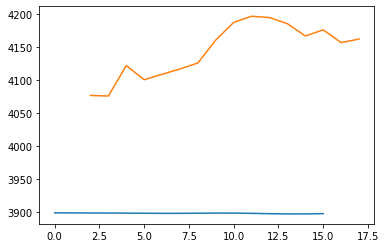

In [199]:
forecast_holiday[-16:].reset_index()['yhat'].plot()
df_test[:16]['y'].plot()

<AxesSubplot: >

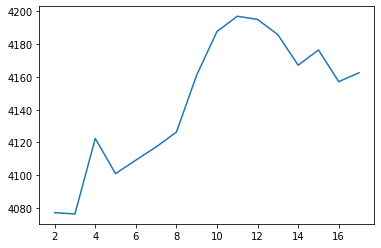

<AxesSubplot: >

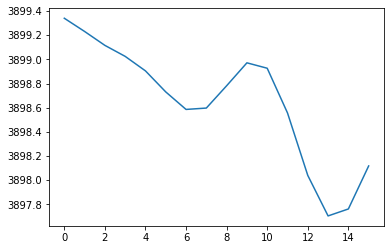

In [200]:
forecast_holiday[-16:].reset_index()['yhat'].plot()

In [ ]:
ajt + features